# DSC 680
# Project
# Author: Muthukumar Kadhirvel
# 19/4/2023

Install necessary packages and read the churn dataset and print the properties of the same

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import seaborn as sns
warnings.filterwarnings("ignore")
churn_df = pd.read_csv('churn.csv')
# Drop unnecessary variables of RowNumber & CustomerID & Surname
churn_df = churn_df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
print(churn_df.shape)
print(churn_df.describe())
print(churn_df.describe(include = ['O']))

(10000, 11)
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818   

We can see that there are 10000 rows and 11 columns out of which Exited is the Target Variable and the rest are all features out of which Geography and Gender are categorical variables.

Create Pie Chart for Exited variable to see how many of the surveyed customers exited the bank

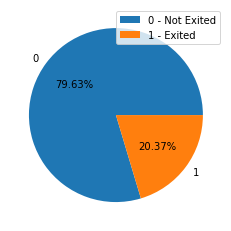

In [43]:
exited_count = churn_df['Exited'].value_counts()
plt.pie(exited_count,labels = exited_count.index, autopct='%1.2f%%')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that we have around 20% of the surveyed customers exited the bank

Create Histogram for Credit Score to see the distribution of the numeric variable

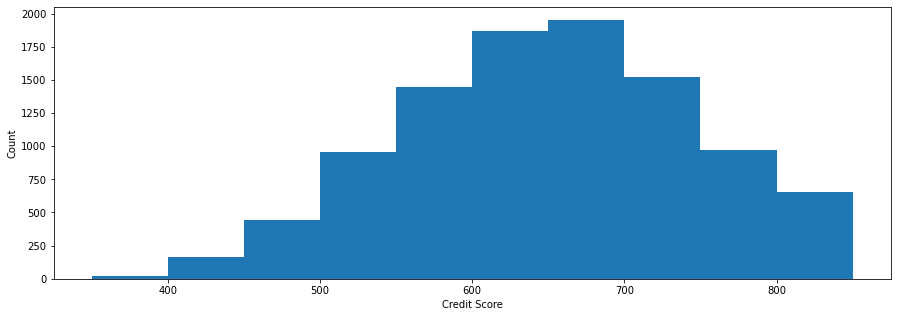

In [44]:
plt.figure(figsize=(15,5))
plt.hist([churn_df['CreditScore']])
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

Most of the surveyed customers have Credit Score between 600 and 700

Create Histogram for Age by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

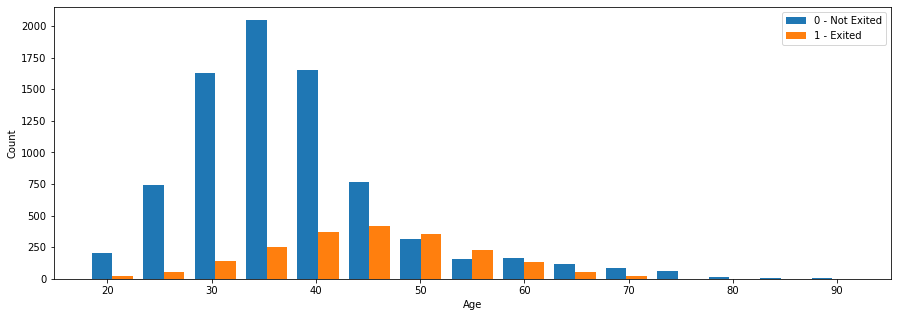

In [45]:
target_0 = churn_df[churn_df['Exited'] == 0]
target_1 = churn_df[churn_df['Exited'] == 1]
target_0_age = list(target_0['Age'])
target_1_age = list(target_1['Age'])
plt.figure(figsize=(15,5))
plt.hist([target_0_age, target_1_age], bins = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

As we can see that customers with age between 50 and 60 exited the bank more than other age classes

Create Histogram for Gender by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

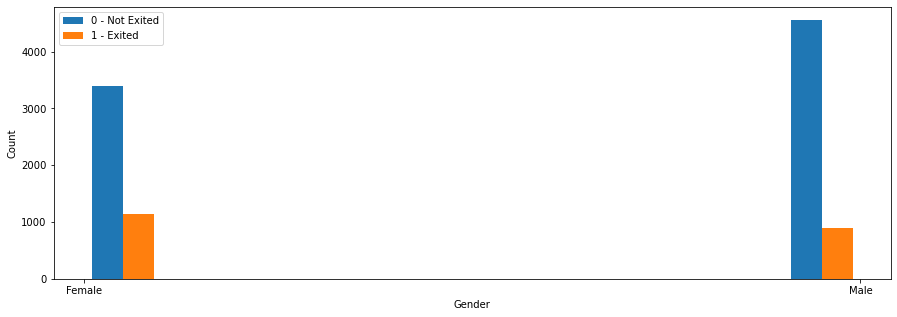

In [46]:
target_0_Gender = list(target_0['Gender'])
target_1_Gender = list(target_1['Gender'])
plt.figure(figsize=(15,5))
plt.hist([target_0_Gender, target_1_Gender])
plt.xlabel('Gender') 
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that female customers leave the bank more than what male customers would do

Create Histograms for Geography by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

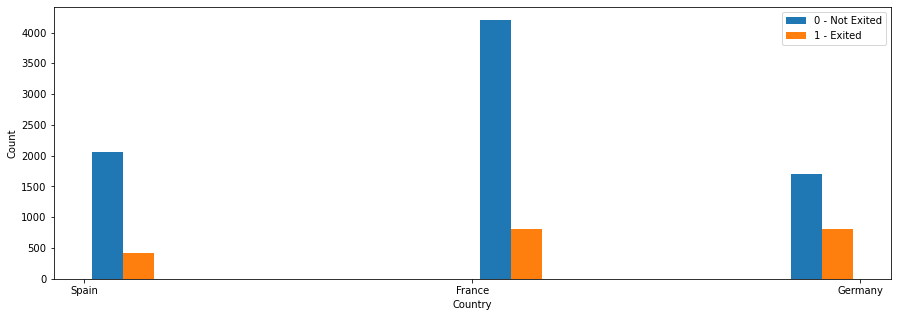

In [47]:
target_0_Country = list(target_0['Geography'])
target_1_Country = list(target_1['Geography'])
plt.figure(figsize=(15,5))
plt.hist([target_0_Country, target_1_Country])
plt.xlabel('Country') 
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that customers from Germany exit the bank more than other countries

Create Histograms for HasCrCard (Has Credit Card) by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

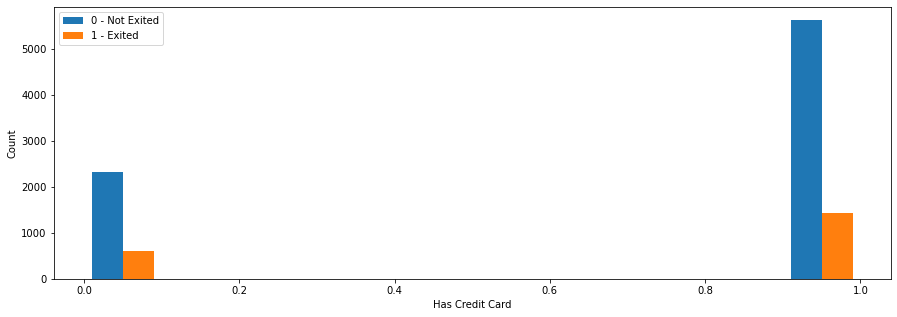

In [48]:
target_0_CC = list(target_0['HasCrCard'])
target_1_CC = list(target_1['HasCrCard'])
plt.figure(figsize=(15,5))
plt.hist([target_0_CC, target_1_CC])
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that having credit card does not impact target variable

Create Histograms for IsActiveMember (Is Active Member) by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

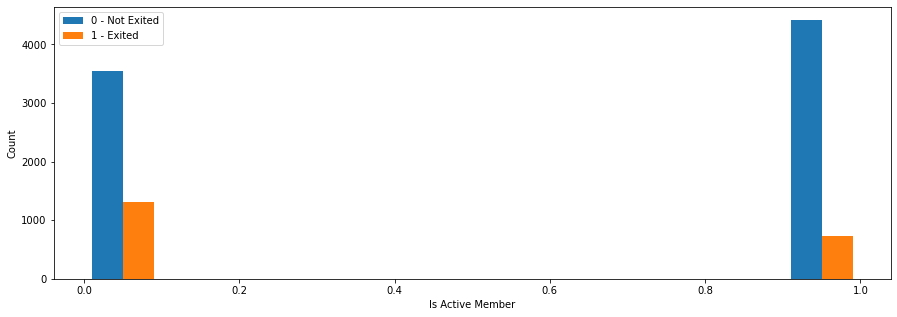

In [49]:
target_0_AM = list(target_0['IsActiveMember'])
target_1_AM = list(target_1['IsActiveMember'])
plt.figure(figsize=(15,5))
plt.hist([target_0_AM, target_1_AM])
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that customers who are not active members exit the bank more than active members

Create Histograms for Tenure by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

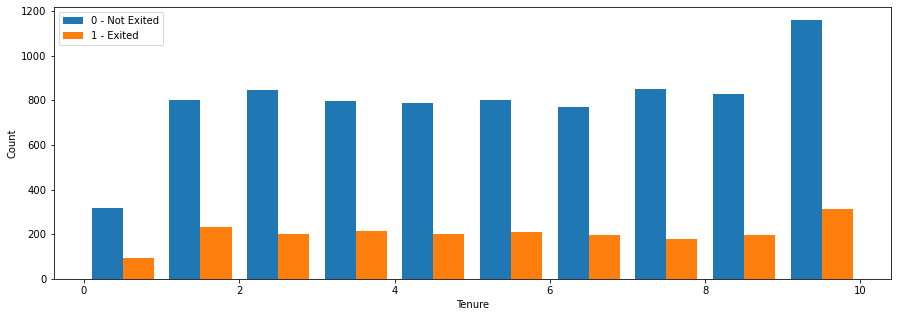

In [50]:
target_0_Tenure = list(target_0['Tenure'])
target_1_Tenure = list(target_1['Tenure'])
plt.figure(figsize=(15,5))
plt.hist([target_0_Tenure, target_1_Tenure])
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that Tenure does not impact target variable

Create Histograms for NumOfProducts (Number of Products) by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

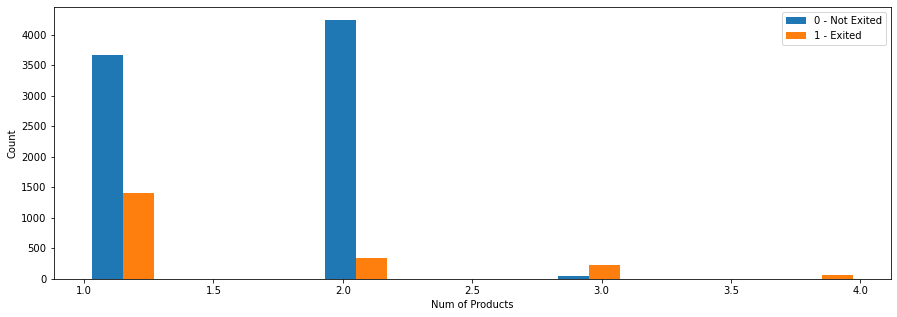

In [51]:
target_0_NOP = list(target_0['NumOfProducts'])
target_1_NOP = list(target_1['NumOfProducts'])
plt.figure(figsize=(15,5))
plt.hist([target_0_NOP, target_1_NOP])
plt.xlabel('Num of Products')
plt.ylabel('Count')
plt.legend(["0 - Not Exited","1 - Exited"])
plt.show()

We can see that customers having more than 2 products exit the bank

Find the missing values

In [52]:
churn_df.isnull().sum()
# None of the fields have missing values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Create dummy variables for the 2 categorical variables

In [53]:
# Create dummy variables for Geography with drop_first so that we just have 2 columns instead of 3
Geography_Temp = pd.get_dummies(churn_df[['Geography']],drop_first=True)
# Create dummy variables for Gender with drop_first so that we just have 1 column instead of 2
Gender_Temp = pd.get_dummies(churn_df[['Gender']],drop_first=True)
# Concatenate new dummy variables into dataframe and drop original columns
churn_df = pd.concat([churn_df,Geography_Temp,Gender_Temp],axis=1)
churn_df.drop(['Geography','Gender'],axis=1,inplace=True)
print(churn_df.head())
print(churn_df.describe())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            

   CreditScore            Age    Tenure       Balance  NumOfProducts  \
0     0.027094   2.853230e-01  0.014001  1.185328e-01       0.047820   
1     0.006738  1.239931e-186  0.161527  1.275563e-32       0.000002   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
0   0.007138    1.561283e-01         0.012097       1.734879e-01   
1   0.475415    1.348269e-55         0.226440       2.059537e-68   

   Geography_Spain   Gender_Male  
0     5.266676e-02  1.065125e-01  
1     1.366655e-07  1.258505e-26  


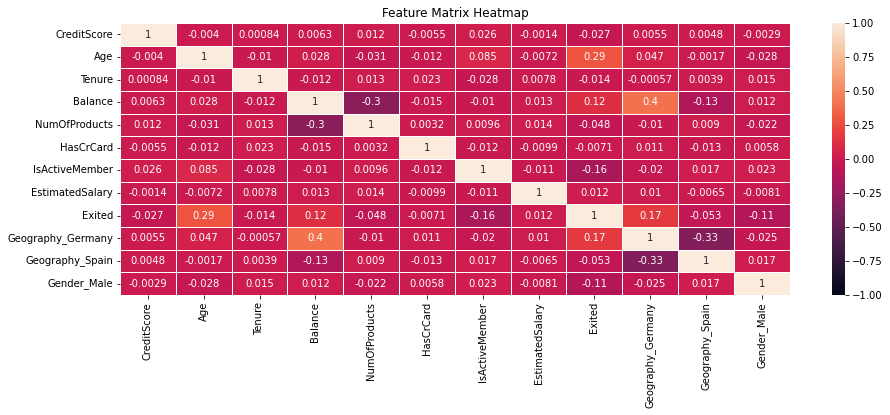

In [54]:
# Create correlation matrix as mixture of feature variables against target variable Exited
# We use point-biserial correlation as our dataset has a mixture of continuous and binary variables
features = churn_df[churn_df.columns[churn_df.columns!='Exited']]
biserialr_matrix = features.corrwith(churn_df['Exited'].astype('float'), method=stats.pointbiserialr)
print(abs(biserialr_matrix))
# We can see from the Correlation Matrix that there are no clear variables that have a good correlation with target variable
# Create heatmap to identify correlation within the other variables as well
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(), vmin = -1, vmax = 1, annot = True, linewidths=1)
plt.title('Feature Matrix Heatmap')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()
# We can see that none of the variables have either a positive or negative correlation with each other

Create a basic Logistic Regression model as ours is a Classification problem

Size of training data is 8000
Size of test data is 2000
Logistic Regression Model accuracy on the test set is 79.75


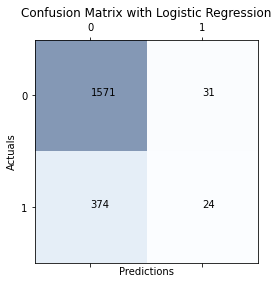

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Create features matrix with all columns except target variable Exited
features = churn_df.drop(['Exited'], axis = 1)
# Create target vector
target = churn_df.Exited
# Create training and test sets with test size being 20%
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
print('Size of training data is',len(features_train))
print('Size of test data is',len(features_test))
# Train an ordinary Logistic regression on the training data.
logit = LogisticRegression()
logit.fit(features_train, target_train)
target_predicted = logit.predict(features_test)
# We use accuracy as the metric as ours is a classification problem
accuracy = accuracy_score(target_test,target_predicted)*100
print('Logistic Regression Model accuracy on the test set is',accuracy)
# We get a good accuracy in the simple Logistic Regression model but accuracy itself is not enough
# Create a confusion matrix for the test set predictions.
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy is 80% and the confusion matrix is also decent enough. But we will still work with other models.

We will now implement KNN model to see if any differences

KNN Model accuracy on the test set is 76.4


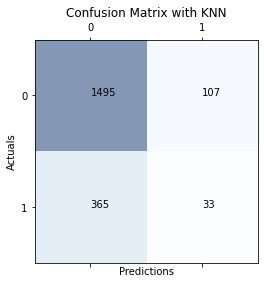

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(features_train, target_train)
target_predicted = knn.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('KNN Model accuracy on the test set is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with KNN')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy has reduced and so does the confusion matrix compared to Logistic Regression

We will now implement SVM to see if it improves accuracy and confusion matrix

Support Vector Machine Model accuracy on the test set is 57.85


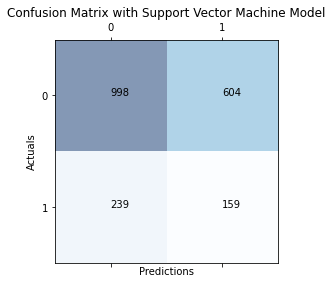

In [57]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(features_train, target_train)
target_predicted = clf.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('Support Vector Machine Model accuracy on the test set is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Support Vector Machine Model')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy is less than Logistic Regression and confusion matrix has lot of false positives

We will now create a Random Forest model to see if it fares better

Random Forest Classifier Model accuracy on the test set is 85.39999999999999


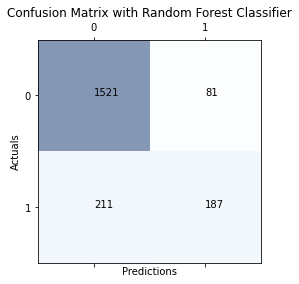

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
target_predicted = classifier.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('Random Forest Classifier Model accuracy on the test set is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Random Forest Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that accuracy and confusion matrix for Random Forest Classifier is better than Logistic Regression

Calculate feature score to identify the most important feauture that affects the target variable

In [59]:
feature_scores = pd.Series(classifier.feature_importances_, index=features_train.columns).sort_values(ascending=False)
feature_scores

Age                  0.246741
EstimatedSalary      0.144214
CreditScore          0.141154
Balance              0.140286
NumOfProducts        0.123451
Tenure               0.080708
IsActiveMember       0.045257
Geography_Germany    0.025329
Gender_Male          0.020373
HasCrCard            0.018622
Geography_Spain      0.013865
dtype: float64

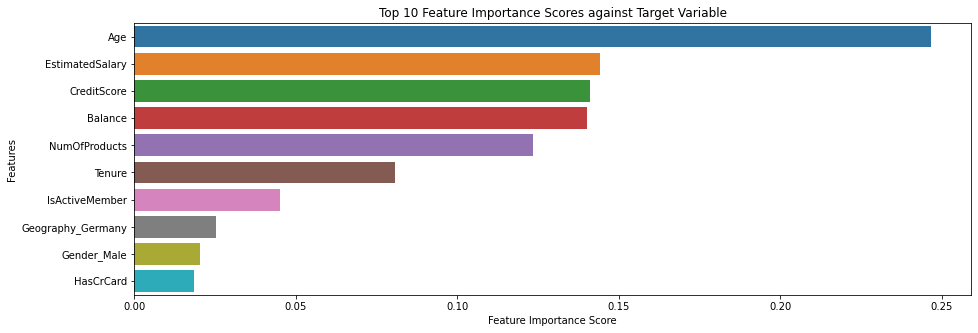

In [60]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
ax.set_title("Top 10 Feature Importance Scores against Target Variable")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

We can see that Age has the most feature importance

We will now perform MinMaxScaler on the dataset and see if it improves accuracy

Random Forest Classifier Model accuracy on the test set with scaled data is 86.6


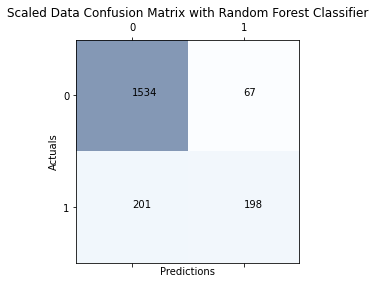

In [61]:
# Perform MinMaxScaler on the data
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler().fit_transform(churn_df)
scaled_churn_df = pd.DataFrame(scaled_data,columns = churn_df.columns)
scl_features = scaled_churn_df.drop(['Exited'], axis = 1)
scl_target = scaled_churn_df.Exited
# Create training and test sets with test size being 20% on the scaled data
scl_features_train,scl_features_test,scl_target_train,scl_target_test = train_test_split(scl_features,scl_target,test_size=0.2)
scl_random = RandomForestClassifier()
scl_random.fit(scl_features_train, scl_target_train)
target_predicted = scl_random.predict(scl_features_test)
accuracy = accuracy_score(scl_target_test,target_predicted)*100
print('Random Forest Classifier Model accuracy on the test set with scaled data is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(scl_target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Scaled Data Confusion Matrix with Random Forest Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy has improved and also confusion matrix is a little better than original

Since Random Forest Classifier with MinMaxScaler has the best accuracy and the confusion matrix, we choose that one and go ahead with implementation.	